In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dir =r'C:\Users\hp\Desktop\Python codes\HandwrittenRecognition\Train'
test_dir =r'C:\Users\hp\Desktop\Python codes\HandwrittenRecognition\Test'

### Data Preprocessing

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_generator.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

In [4]:
train_datagen = ImageDataGenerator(width_shift_range = 0.20,
                                  height_shift_range = 0.20,
                                  shear_range =0.2,
                                  zoom_range =0.2,
                                  rescale=1./255,
                                  validation_split = 0.30)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size =(32,32),
                    color_mode ='grayscale',
                    class_mode = 'sparse',
                    seed = 50,
                    subset ='training')

valid_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size =(32,32),
                    color_mode ='grayscale',
                    class_mode = 'sparse',
                    seed = 50,
                    subset ='validation')

Found 54740 images belonging to 46 classes.
Found 23460 images belonging to 46 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


Using TensorFlow backend.


In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (32,32,1), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 46, activation = 'softmax'))


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

In [15]:
from tensorflow.keras import optimizers
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only = True)

In [23]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs =10,
            validation_data = valid_generator,
            validation_steps = 50
            )

Epoch 1/10
100/100 [==============================] - 25s 252ms/step - loss: 0.3405 - accuracy: 0.8897 - val_loss: 0.4387 - val_accuracy: 0.8625
Epoch 2/10
100/100 [==============================] - 24s 240ms/step - loss: 0.3150 - accuracy: 0.9022 - val_loss: 0.5733 - val_accuracy: 0.8619
Epoch 3/10
100/100 [==============================] - 24s 241ms/step - loss: 0.2891 - accuracy: 0.9025 - val_loss: 0.2934 - val_accuracy: 0.8575
Epoch 4/10
100/100 [==============================] - 24s 238ms/step - loss: 0.2932 - accuracy: 0.9016 - val_loss: 0.5392 - val_accuracy: 0.8756
Epoch 5/10
100/100 [==============================] - 24s 243ms/step - loss: 0.3058 - accuracy: 0.9056 - val_loss: 0.3648 - val_accuracy: 0.8706
Epoch 6/10
100/100 [==============================] - 24s 239ms/step - loss: 0.3428 - accuracy: 0.8878 - val_loss: 0.2636 - val_accuracy: 0.8844
Epoch 7/10
100/100 [==============================] - 24s 243ms/step - loss: 0.2883 - accuracy: 0.9100 - val_loss: 0.6772 - val_ac

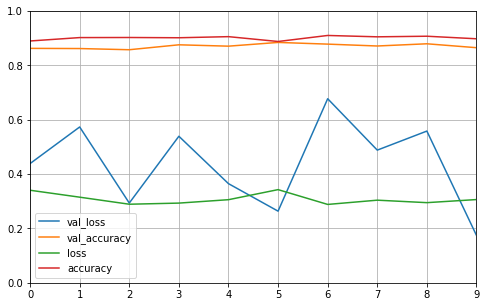

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [49]:
test_generator = train_datagen.flow_from_directory(
                    test_dir,
                    target_size =(32,32),
                    color_mode ='grayscale',
                    class_mode = 'sparse',
                    shuffle = False,
                    batch_size = 1
                    seed = 50)

model.evaluate_generator(test_generator,steps = 50)

Found 13800 images belonging to 46 classes.
  ...
    to  
  ['...']


[0.28080391582567243, 0.9075]

In [27]:
model.save("Final.h5")
del model
keras.backend.clear_session()


In [28]:
model = keras.models.load_model("Final.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

In [37]:
model.predict_generator(test_generator,steps = len(test_generator))

TypeError: 'DirectoryIterator' object is not callable

In [32]:
unseen_dir = r'C:\Users\hp\Desktop\Python codes\HandwrittenRecognition\unseen'

In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)

unseen_generator = train_datagen.flow_from_directory(
                    unseen_dir,
                    target_size =(32,32),
                    color_mode ='grayscale',
                    class_mode = 'sparse',
                    seed = 50,
                    batch_size =1,
                    shuffle = False)

Found 13 images belonging to 1 classes.


In [45]:
fn=unseen_generator.filenames

s=len(fn)

In [46]:
pred=model.predict_generator(unseen_generator,steps =s)
pred

TypeError: 'DirectoryIterator' object is not callable